In [93]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [94]:
# PREDICTING ECONOMIC IMPACT 
# Load and clean the dataset

file_path = "DATA/global_climate_events_economic_impact_2020_2025.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns (if not already done)
columns_to_drop = ['latitude', 'longitude', 'international_aid_million_usd', 'aid_percentage']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Drop missing values for simplicity (you can later replace with imputation)
df_econ = df.dropna(subset=[
    'country', 'event_type', 'severity', 'duration_days',
    'infrastructure_damage_score', 'impact_per_capita', 'economic_impact_million_usd'
])

In [95]:
# Define features and target

features = [
    'country',
    'event_type',
    'severity',
    'duration_days',
    'infrastructure_damage_score',
    'impact_per_capita'
]

target_econ = 'economic_impact_million_usd'

X_econ = df[features]
y_econ = df[target_econ]

In [96]:
# Split data into train/test
X_econ_train, X_econ_test, y_econ_train, y_econ_test = train_test_split(
    X_econ, y_econ, test_size=0.2, random_state=42
)

In [97]:
# Preprocess categorical data 
categorical_features = ['country', 'event_type']
numeric_features = ['severity', 'duration_days', 'infrastructure_damage_score', 'impact_per_capita']

# One-hot encode categorical variables
preprocessor_econ = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [98]:
# Build and train RandomForest Model

model_econ = Pipeline(steps=[
    ('preprocessor', preprocessor_econ),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ))
])

model_econ.fit(X_econ_train, y_econ_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [99]:
# Make predictions and evaluate

y_econ_pred = model_econ.predict(X_econ_test)

rmse = np.sqrt(mean_squared_error(y_econ_test, y_econ_pred))
r2 = r2_score(y_econ_test, y_econ_pred)

print("Economic Impact Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Economic Impact Model Evaluation:
Root Mean Squared Error (RMSE): 28.17
R² Score: 0.190


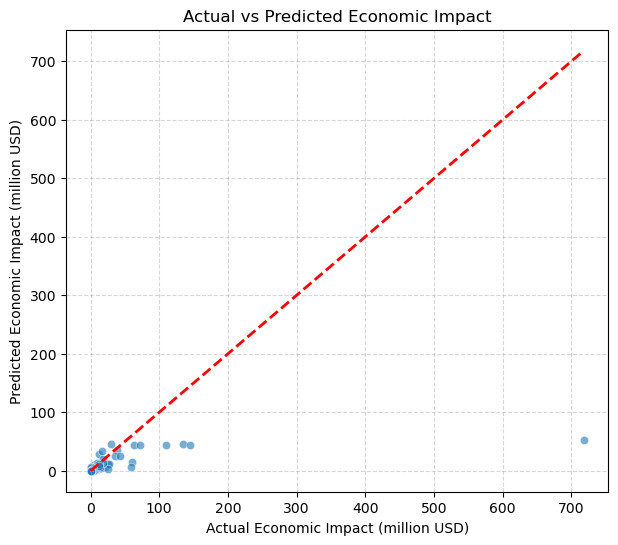

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_econ_test, y=y_econ_pred, alpha=0.6)
plt.plot([y_econ_test.min(), y_econ_test.max()],
         [y_econ_test.min(), y_econ_test.max()],
         'r--', lw=2)
plt.title("Actual vs Predicted Economic Impact")
plt.xlabel("Actual Economic Impact (million USD)")
plt.ylabel("Predicted Economic Impact (million USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [101]:
# Example
example = pd.DataFrame({
    'country': ['India'],
    'event_type': ['Flood'],
    'severity': [7],
    'duration_days': [10],
    'infrastructure_damage_score': [80],
    'impact_per_capita': [0.003]
})

predicted_impact = model.predict(example)
print(f"\nPredicted Economic Impact for example event: ${predicted_impact[0]:,.2f} million USD")


Predicted Economic Impact for example event: $1.55 million USD


In [102]:
# PREDICTING AFFECTED POPULATION 


# Load the same dataset
file_path = "DATA/global_climate_events_economic_impact_2020_2025.csv"
df = pd.read_csv(file_path)

# Drop unnecessary or unrelated columns
columns_to_drop = ['latitude', 'longitude', 'international_aid_million_usd', 'aid_percentage']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Drop missing rows for required columns
df_pop = df.dropna(subset=[
    'country', 'event_type', 'deaths', 'injuries', 'total_casualties',
    'severity', 'duration_days', 'infrastructure_damage_score', 'affected_population'
])

# Define features and target 
features_pop = [
    'country',
    'event_type',
    'deaths',
    'injuries',
    'total_casualties',
    'severity',
    'duration_days',
    'infrastructure_damage_score'
]

target_pop = 'affected_population'

X_pop = df_pop[features_pop]
y_pop = df_pop[target_pop]

# Log-transformation due to skew 
y_pop = np.log1p(y_pop)

# Train and test
X_pop_train, X_pop_test, y_pop_train, y_pop_test = train_test_split(
    X_pop, y_pop, test_size=0.2, random_state=42
)

# Preprocessing 
categorical_pop = ['country', 'event_type']
numeric_pop = ['deaths', 'injuries', 'total_casualties', 'severity', 'duration_days', 'infrastructure_damage_score']

preprocessor_pop = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_pop),
    ('num', 'passthrough', numeric_pop)
])

# Build RandomForest Model 
model_pop = Pipeline([
    ('preprocessor', preprocessor_pop),
    ('regressor', RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42
    ))
])

# Train Model 
model_pop.fit(X_pop_train, y_pop_train)

# Evaluate Model 
y_pop_pred_log = model_pop.predict(X_pop_test)
y_pop_pred = np.expm1(y_pop_pred_log)
y_pop_true = np.expm1(y_pop_test)

rmse_pop = np.sqrt(mean_squared_error(y_pop_true, y_pop_pred))
r2_pop = r2_score(y_pop_true, y_pop_pred)

print("Affected Population Model Evaluation")
print(f"RMSE: {rmse_pop:.2f}")
print(f"R²: {r2_pop:.3f}")



Affected Population Model Evaluation
RMSE: 2157289.85
R²: 0.583


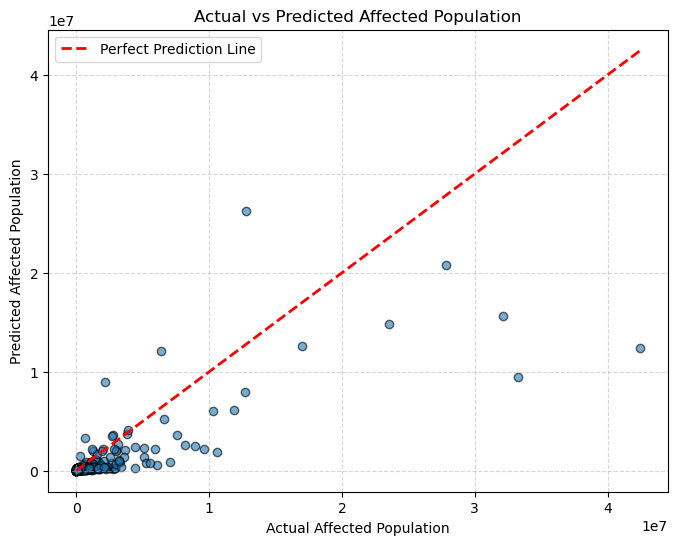

In [103]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pop_true, y_pop_pred, alpha=0.6, edgecolors='k')
plt.plot([y_pop_true.min(), y_pop_true.max()],
         [y_pop_true.min(), y_pop_true.max()],
         'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel("Actual Affected Population")
plt.ylabel("Predicted Affected Population")
plt.title("Actual vs Predicted Affected Population")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [104]:
# Example 
example_pop = pd.DataFrame({
    'country': ['Philippines'],
    'event_type': ['Typhoon'],
    'deaths': [150],
    'injuries': [1000],
    'total_casualties': [1150],
    'severity': [8],
    'duration_days': [5],
    'infrastructure_damage_score': [75]
})

predicted_pop_log = model_pop.predict(example_pop)
predicted_pop = np.expm1(predicted_pop_log)

print(f"\nPredicted Affected Population: {predicted_pop[0]:,.0f} people")



Predicted Affected Population: 286,276 people
